Classifier: K-Nearest Neighbors
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.97      0.97     49936
        True       0.97      0.97      0.97     50064

    accuracy                           0.97    100000
   macro avg       0.97      0.97      0.97    100000
weighted avg       0.97      0.97      0.97    100000

Confusion Matrix:
[[48556  1380]
 [ 1339 48725]]


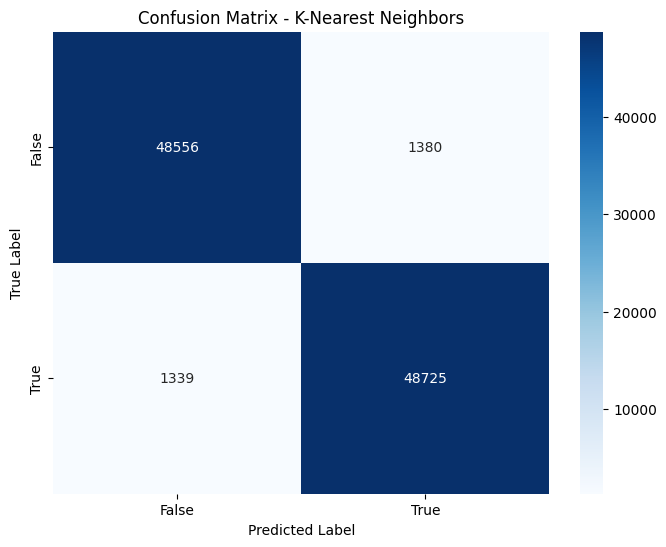

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


data = pd.read_csv("generated_dataset.csv")

# Split the dataset into features (X) and the target variable (y)
X = data.drop(['Cloudburst', 'Location (Latitude, Longitude)', 'Date', 'Impact or Damage'], axis=1)
y = data["Cloudburst"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

# Testing classifier and print results
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(cm)
    print("=" * 40)

    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classifier.classes_,
                yticklabels=classifier.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


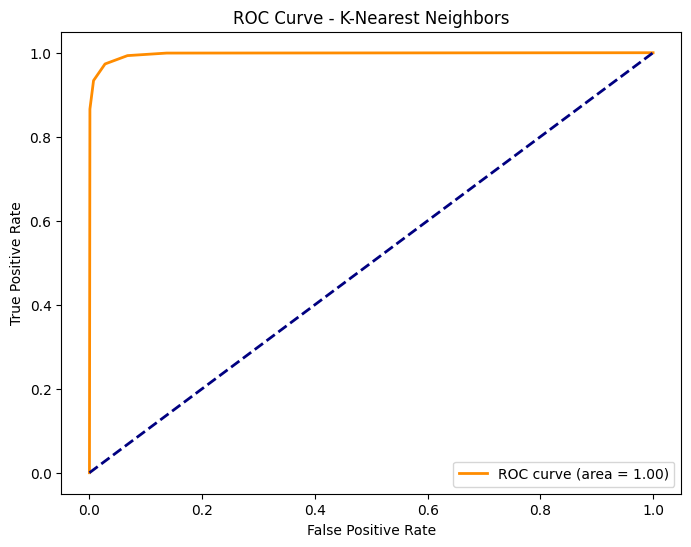

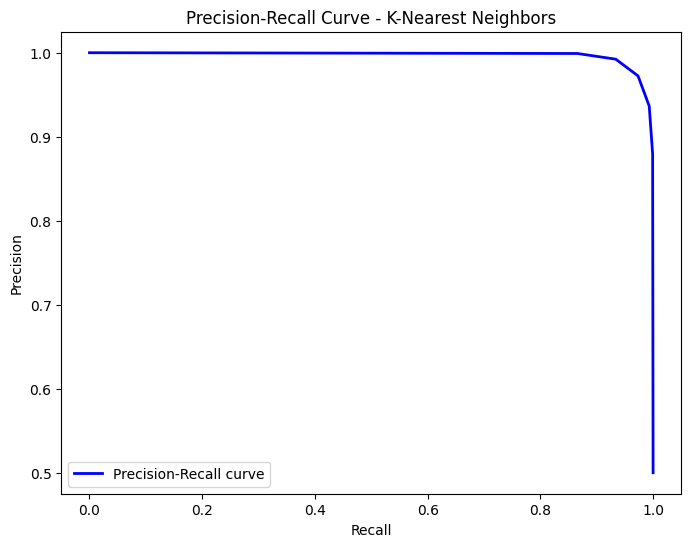

In [3]:
# ROC Curve
from sklearn.metrics import roc_curve, auc, precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {name}')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, classifier.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve - {name}')
plt.legend(loc="lower left")
plt.show()
print("=" * 40)

In [4]:
# Training evaluation
classifier.fit(X_train, y_train)
y_train_pred = classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Testing evaluation
y_test_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("Training Evaluation:")
print(f"Accuracy: {train_accuracy:.2f}")
print("Classification Report:")
print(train_report)
print("Confusion Matrix:")
print(train_cm)
print("=" * 40)

print("Testing Evaluation:")
print(f"Accuracy: {test_accuracy:.2f}")
print("Classification Report:")
print(test_report)
print("Confusion Matrix:")
print(test_cm)
print("=" * 40)

Training Evaluation:
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99    200383
        True       0.99      0.99      0.99    199617

    accuracy                           0.99    400000
   macro avg       0.99      0.99      0.99    400000
weighted avg       0.99      0.99      0.99    400000

Confusion Matrix:
[[197498   2885]
 [  2946 196671]]
Testing Evaluation:
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.97      0.97     49936
        True       0.97      0.97      0.97     50064

    accuracy                           0.97    100000
   macro avg       0.97      0.97      0.97    100000
weighted avg       0.97      0.97      0.97    100000

Confusion Matrix:
[[48556  1380]
 [ 1339 48725]]


In [5]:
import joblib
joblib.dump(classifier, 'cloudburst_prediction.pkl')

['cloudburst_prediction.pkl']